# Загрузка

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/pricerunner_aggregate.csv")

In [3]:
df.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

In [4]:
df.drop(columns=["Product ID", " Merchant ID", " Cluster ID", " Category ID", " Cluster Label"], inplace=True)

In [5]:
df.rename(columns={"Product Title": "Text", " Category Label": "Label"}, inplace=True)

### Данные представляют из себя краткое текстовое описание товара с указанием базовых характеристик, например, указанием цвета или оперативной памяти для смартфона. Целевой переменной является категория товара, которую требуется предсказать. В данном датасете отсутствуют дубликаты или отсутствующие занчения, что облегачает дальнейший анализ и обработку данных

In [6]:
df

,Text,Label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones
...,...,...
35306,smeg fab28 60cm retro style right hand hinge f...,Fridges
35307,smeg fab28 60cm retro style left hand hinge fr...,Fridges
35308,smeg fab28 60cm retro style left hand hinge fr...,Fridges
35309,candy 60cm built under larder fridge cru160nek,Fridges


# Базовый EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Присутстсвет небольшой дизбаланс классов. Так же, имеются схожие категории, такие как Freezers, Fridge Freezers и Fridges. Данные категории могут иметь большое количество схожих текстовых описаний\слов и характеристик, что может усложить их классификацию. Может потребоваться обработка отдельных слов, чтобы детальнее классифицировать каждую из категорий. Если возможно, такой точной классификацией можно пренебречь, отнеся все к одному классу - Freezers

<Axes: xlabel='count', ylabel='Label'>

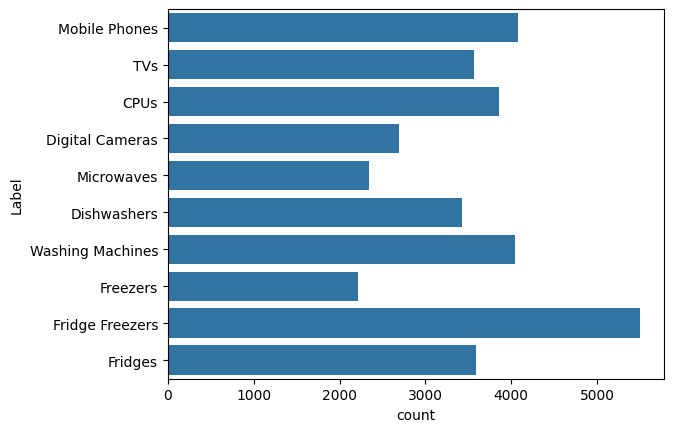

In [8]:
sns.countplot(data=df, y="Label")

In [9]:
df["tl"] = df["Text"].apply(lambda x: len(x))

Длина текстового описания обычно не превышает 125 символов. Выбросов в виде слишком длинных строк не присустствует. Такое количество символов является удобоворимым для обработки моделей

<Axes: xlabel='tl', ylabel='Count'>

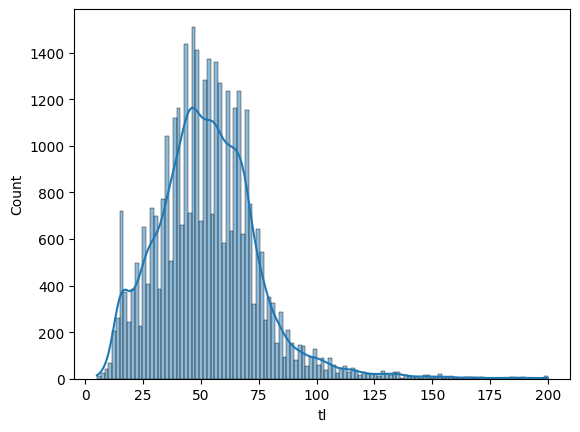

In [10]:
sns.histplot(data=df, x=df["tl"], kde=True)

In [11]:
df["Text"].str.split().explode().value_counts()

Text
fridge        6253
freezer       6003
white         5351
in            4340
black         3928
              ... 
mo20dsii         1
515/ix/amw       1
515/ix           1
m.grill          1
ra610w           1
Name: count, Length: 21188, dtype: int64

## Облако слов

In [ ]:
!pip install wordcloud

In [12]:
from wordcloud import WordCloud

Исходя из полученных облаков, можно заметить, что, как было сказано ранее, Freezers, Fridges и Fridge Freezers имеют большое количество схожих слов. При попытке удалить самые часто встречаемые слова, качество модели для классификации этих классов упало. Требуется другое решение

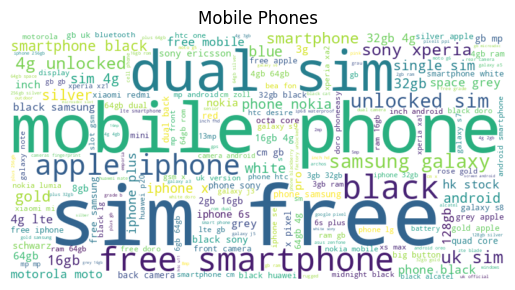

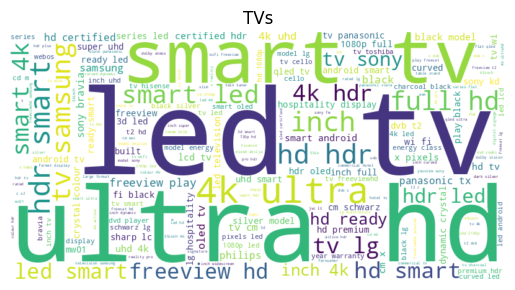

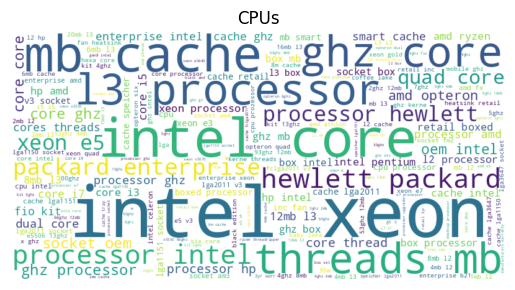

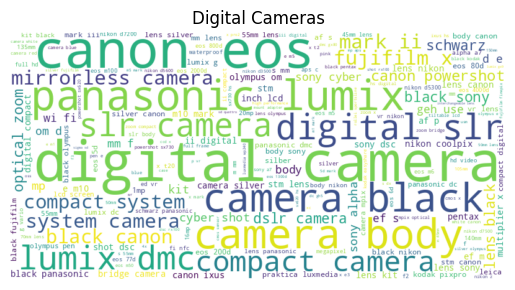

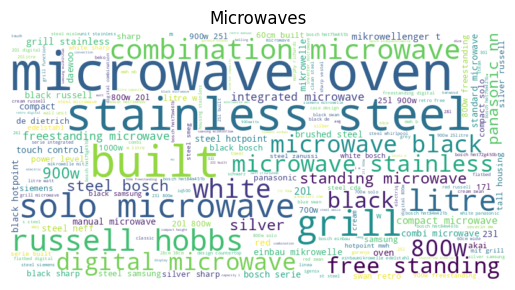

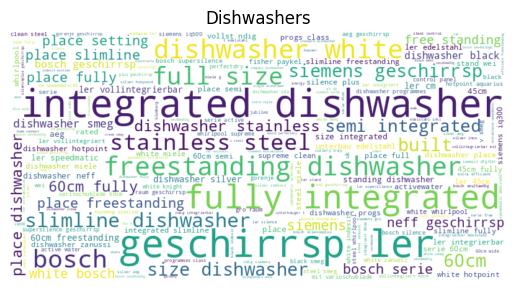

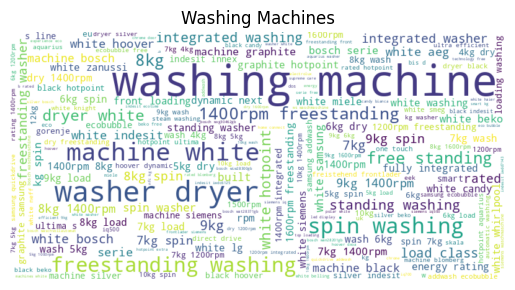

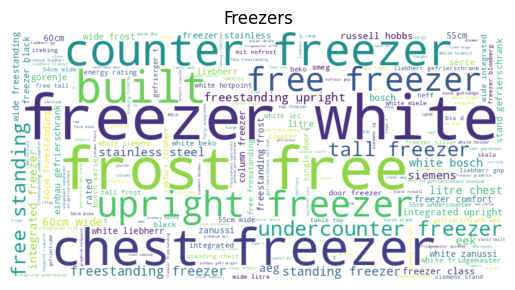

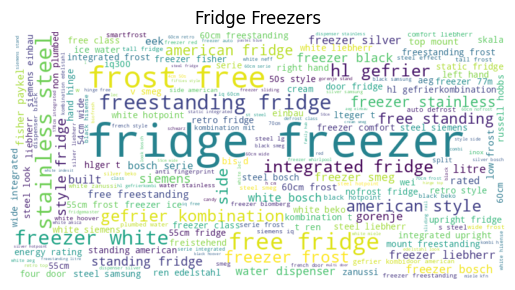

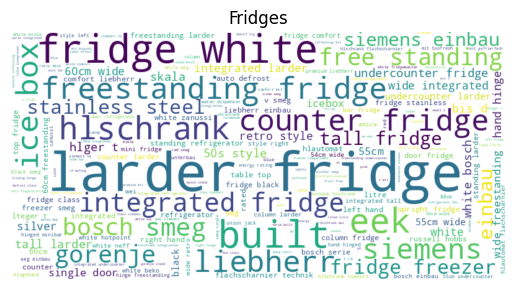

In [13]:
for col in df["Label"].unique():
    text = " ".join(df[df["Label"] == col]["Text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(col)
    plt.show()

Обработка текстов на удаление спецсимволов, удаление стоп-слов. При желании, можно добавить дополнительные регулярные выражения по удалению лишних пробелов или расширить список стоп слов

In [14]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aaddssww/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re
from nltk.corpus import stopwords

def clean(review):
    review = review.lower()
    review = re.sub("[^a-z A-Z 0-9-]+", "", review)
    review = " ".join([word for word in review.split() if word not in stopwords.words("english")])
    
    return review

In [16]:
df["Text"] = df["Text"].apply(clean)
df.head(10)

,Text,Label,tl
0,apple iphone 8 plus 64gb silver,Mobile Phones,31
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones,35
2,apple mq8n2ba iphone 8 plus 64gb 55 12mp sim f...,Mobile Phones,70
3,apple iphone 8 plus 64gb space grey,Mobile Phones,35
4,apple iphone 8 plus gold 55 64gb 4g unlocked s...,Mobile Phones,54
5,apple iphone 8 plus gold 55 64gb 4g unlocked s...,Mobile Phones,54
6,apple iphone 8 plus 64 gb space grey,Mobile Phones,36
7,apple iphone 8 plus 64gb space grey,Mobile Phones,35
8,apple iphone 8 plus 64gb space grey,Mobile Phones,35
9,apple iphone 8 plus 64gb space grey,Mobile Phones,35


In [17]:
for label in df["Label"].unique():
    print(f"label -> {label}", "\n", df[df["Label"] == label]["Text"].str.split().explode().value_counts())

label -> Mobile Phones 
 Text
sim           1611
free          1016
black         1010
phone          893
smartphone     818
              ... 
9651             1
2plus            1
sunny2           1
razer            1
7210             1
Name: count, Length: 3049, dtype: int64
label -> TVs 
 Text
tv             2926
hd             1994
smart          1866
led            1752
4k             1593
               ... 
ue49m5000ak       1
32d302b           1
kd65zf9           1
55ao6usb          1
b2004             1
Name: count, Length: 2990, dtype: int64
label -> CPUs 
 Text
intel              2706
processor          2633
core               2561
ghz                1892
xeon               1622
                   ... 
cm8064601467204       1
1265lv3               1
sennheiser            1
cedpc                 1
40th                  1
Name: count, Length: 2489, dtype: int64
label -> Digital Cameras 
 Text
camera         1572
digital         819
black           736
canon           664
lens

# Обучение модели

In [18]:
from sklearn.model_selection import train_test_split

### Сплит данных

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Label"], test_size=0.3, random_state=42)

Выбор всех популярных моделей для классификации для дальнейшего выбора наилучшей из них

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

### Подготовка множества базовых моделей для дальнейшего выбора

In [24]:
models = {
    "LogReg": LogisticRegression(),
    "RFC": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "RC": RidgeClassifier(),
    "MLP": MLPClassifier(),
    "DT": DecisionTreeClassifier(),
}

In [25]:
labels = sorted(list(set(y_test)))

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

### Обучение, метрики, confusion matrix

==================LogisticRegression()=======================
                  precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00      1139
 Digital Cameras       0.99      0.99      0.99       826
     Dishwashers       0.89      0.95      0.92      1000
        Freezers       0.98      0.90      0.94       652
 Fridge Freezers       0.96      0.92      0.94      1676
         Fridges       0.86      0.92      0.89      1102
      Microwaves       1.00      0.94      0.97       694
   Mobile Phones       0.96      0.99      0.98      1223
             TVs       0.97      0.98      0.98      1090
Washing Machines       0.95      0.94      0.95      1192

        accuracy                           0.95     10594
       macro avg       0.96      0.95      0.95     10594
    weighted avg       0.95      0.95      0.95     10594



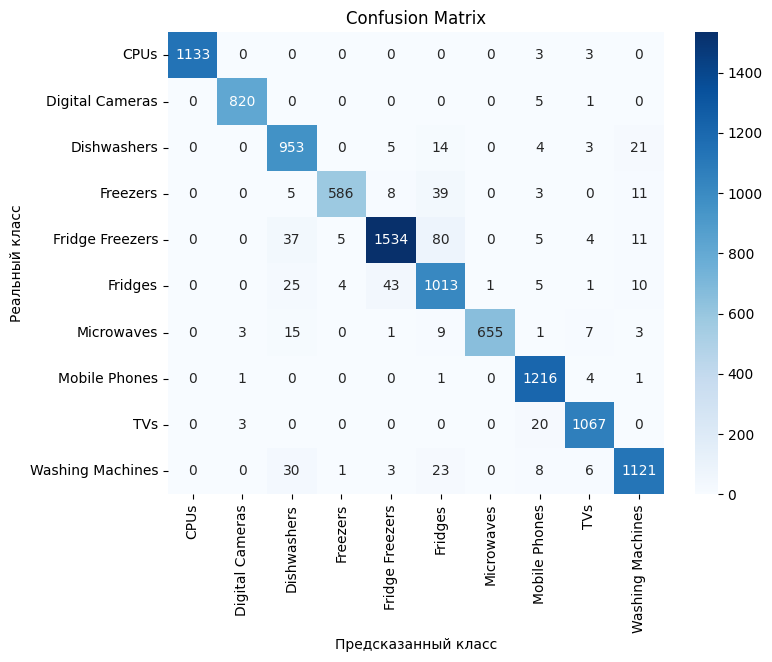

==================RandomForestClassifier()=======================
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00      1139
 Digital Cameras       1.00      0.99      0.99       826
     Dishwashers       0.93      0.92      0.93      1000
        Freezers       0.94      0.91      0.92       652
 Fridge Freezers       0.92      0.91      0.92      1676
         Fridges       0.87      0.91      0.89      1102
      Microwaves       0.92      0.96      0.94       694
   Mobile Phones       0.98      0.99      0.98      1223
             TVs       0.98      0.98      0.98      1090
Washing Machines       0.98      0.94      0.96      1192

        accuracy                           0.95     10594
       macro avg       0.95      0.95      0.95     10594
    weighted avg       0.95      0.95      0.95     10594



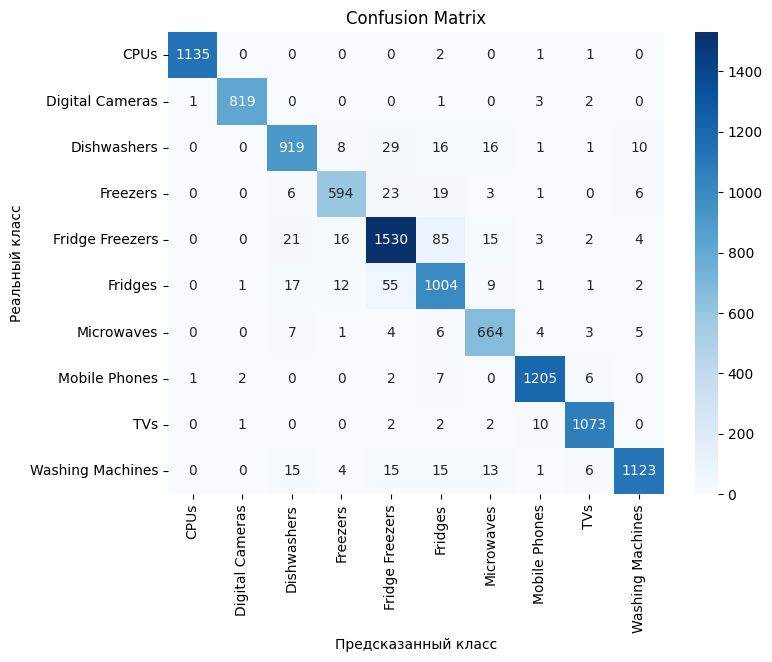

==================KNeighborsClassifier()=======================
                  precision    recall  f1-score   support

            CPUs       0.99      1.00      0.99      1139
 Digital Cameras       0.99      0.99      0.99       826
     Dishwashers       0.89      0.96      0.93      1000
        Freezers       0.76      0.81      0.78       652
 Fridge Freezers       0.91      0.91      0.91      1676
         Fridges       0.89      0.85      0.87      1102
      Microwaves       0.99      0.96      0.97       694
   Mobile Phones       0.99      0.99      0.99      1223
             TVs       0.98      0.98      0.98      1090
Washing Machines       0.98      0.94      0.96      1192

        accuracy                           0.94     10594
       macro avg       0.94      0.94      0.94     10594
    weighted avg       0.94      0.94      0.94     10594



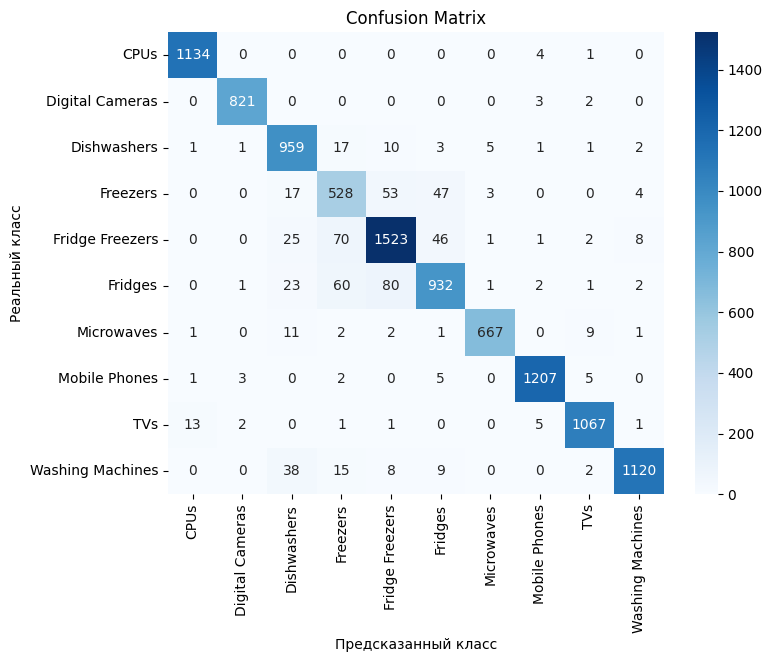

==================RidgeClassifier()=======================
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00      1139
 Digital Cameras       0.99      1.00      0.99       826
     Dishwashers       0.95      0.97      0.96      1000
        Freezers       0.98      0.95      0.97       652
 Fridge Freezers       0.97      0.95      0.96      1676
         Fridges       0.90      0.95      0.92      1102
      Microwaves       1.00      0.97      0.98       694
   Mobile Phones       0.98      1.00      0.99      1223
             TVs       0.99      0.99      0.99      1090
Washing Machines       0.98      0.97      0.98      1192

        accuracy                           0.97     10594
       macro avg       0.98      0.97      0.97     10594
    weighted avg       0.97      0.97      0.97     10594



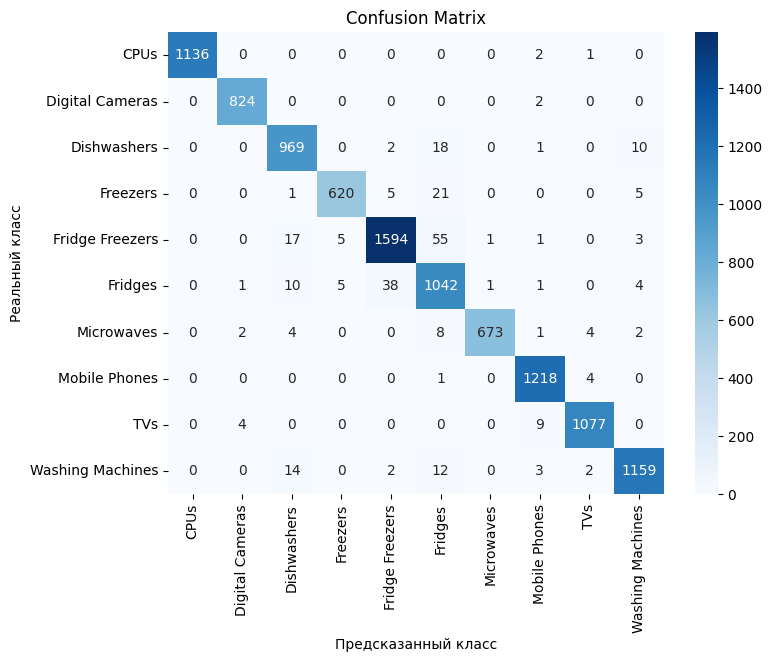

==================MLPClassifier()=======================
                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00      1139
 Digital Cameras       1.00      1.00      1.00       826
     Dishwashers       0.93      0.98      0.95      1000
        Freezers       0.98      0.96      0.97       652
 Fridge Freezers       0.97      0.95      0.96      1676
         Fridges       0.95      0.94      0.94      1102
      Microwaves       0.99      0.97      0.98       694
   Mobile Phones       0.99      0.99      0.99      1223
             TVs       0.98      1.00      0.99      1090
Washing Machines       0.97      0.97      0.97      1192

        accuracy                           0.97     10594
       macro avg       0.98      0.97      0.97     10594
    weighted avg       0.97      0.97      0.97     10594



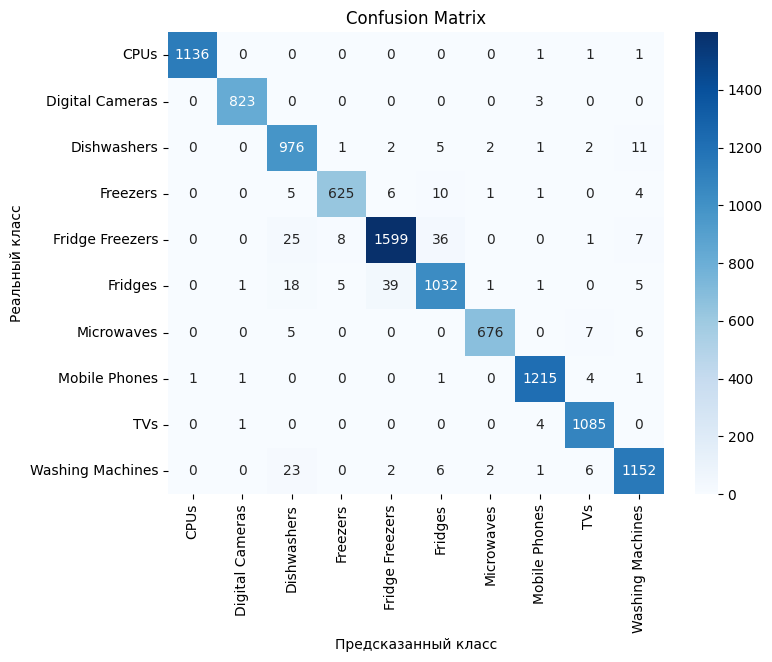

==================DecisionTreeClassifier()=======================
                  precision    recall  f1-score   support

            CPUs       1.00      0.99      0.99      1139
 Digital Cameras       0.99      0.97      0.98       826
     Dishwashers       0.92      0.91      0.92      1000
        Freezers       0.93      0.90      0.92       652
 Fridge Freezers       0.91      0.90      0.91      1676
         Fridges       0.87      0.88      0.88      1102
      Microwaves       0.95      0.94      0.94       694
   Mobile Phones       0.93      0.99      0.96      1223
             TVs       0.95      0.95      0.95      1090
Washing Machines       0.91      0.93      0.92      1192

        accuracy                           0.93     10594
       macro avg       0.94      0.94      0.94     10594
    weighted avg       0.93      0.93      0.93     10594



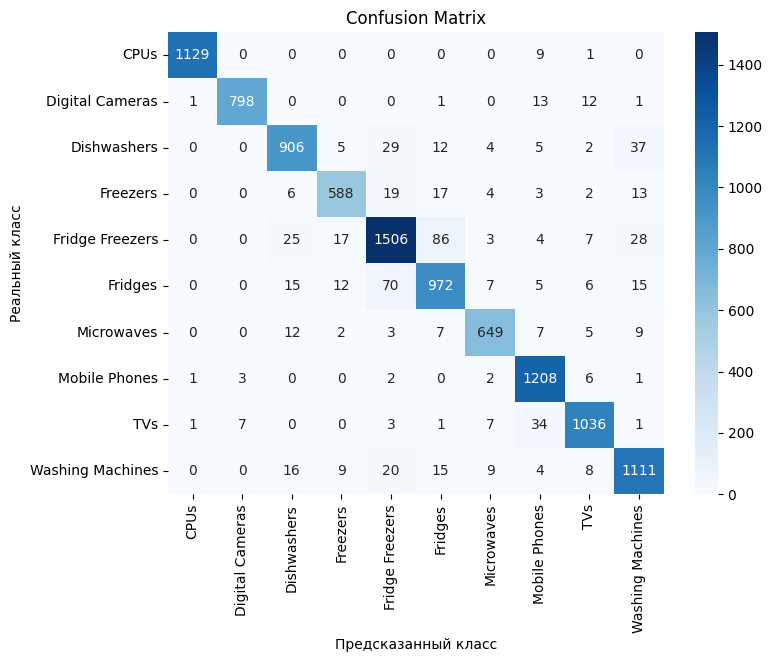

In [31]:
for name, model in models.items():
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"=================={model}=======================")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("Real label")
    plt.title("Confusion Matrix")
    plt.show()

Исходя из полученных результатов была выбрана модель RidgeClassifier, так как она имеет лучшие показатеили precision\recall, а так же неплохо справилась с указанными проблемными классами. Данная модель является нетребовательной к ресурсам, потому, среди схожих по метрикам моделям была выбранна эта

### Подбор гиперпараметров

In [25]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

Балансировка классов для лучших показателей модели

In [22]:
class_weights = compute_class_weight("balanced", classes=np.unique(df["Label"]), y=df["Label"])

In [69]:
param_grid = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__max_df": [0.8, 1.0],
    "tfidf__min_df": [2, 5],
    "tfidf__max_features": [5000, 10000, None],
    "model__alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
    "model__fit_intercept": [True, False],
    "model__solver": ["auto", "sparse_cg", "lsqr", "saga"],
    "model__tol": [1e-2, 1e-3, 1e-4],
    # "model__class_weight": list(dict(enumerate(class_weights)))
    "model__class_weight": ["balanced"]
}

In [70]:
base_model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", RidgeClassifier())
])

In [24]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [71]:
grid = GridSearchCV(base_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

In [73]:
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Лучшие параметры: {'model__alpha': 0.1, 'model__class_weight': 'balanced', 'model__fit_intercept': False, 'model__solver': 'lsqr', 'model__tol': 0.01, 'tfidf__max_df': 0.8, 'tfidf__max_features': None, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Лучший скор: 0.9667029541301583


In [27]:
best_model = Pipeline([
    ("tfidf", TfidfVectorizer(max_df=0.8, max_features=None, min_df=2, ngram_range=(1,2))),
    ("model", RidgeClassifier(alpha=0.1, class_weight="balanced", fit_intercept=False, solver="lsqr", tol=0.01)),
])

Метрики модели после получения нужных гиперпараметров

                  precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00      1139
 Digital Cameras       1.00      1.00      1.00       826
     Dishwashers       0.93      0.97      0.95      1000
        Freezers       0.91      0.94      0.92       652
 Fridge Freezers       0.97      0.95      0.96      1676
         Fridges       0.93      0.93      0.93      1102
      Microwaves       0.99      0.98      0.98       694
   Mobile Phones       0.99      1.00      0.99      1223
             TVs       0.99      0.99      0.99      1090
Washing Machines       0.99      0.96      0.97      1192

        accuracy                           0.97     10594
       macro avg       0.97      0.97      0.97     10594
    weighted avg       0.97      0.97      0.97     10594



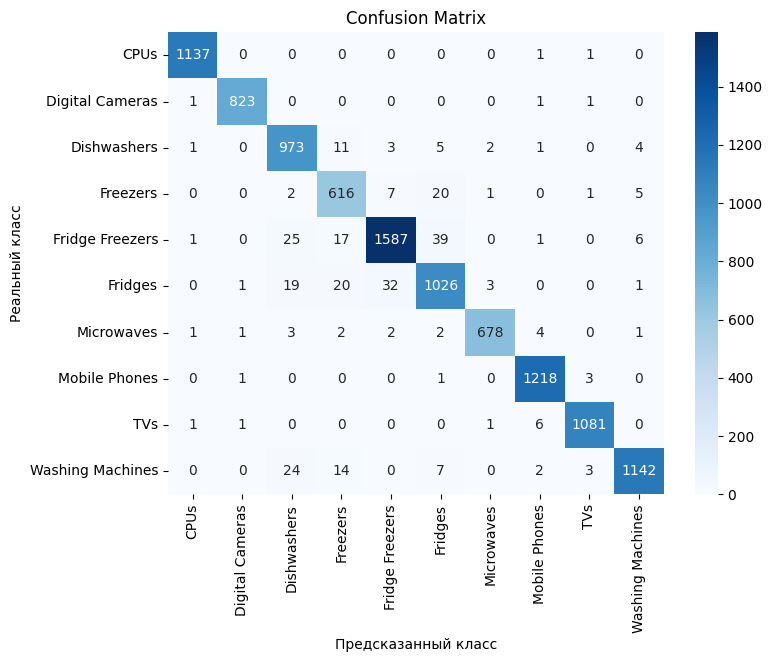

In [75]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("Real label")
plt.title("Confusion Matrix")
plt.show()

### Кросс-валидация

In [83]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [84]:
k_folds = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(best_model, df["Text"], df["Label"], cv = k_folds)

Данная модель продемонстрировала хороший результат как на обучающих \ тестовых, так и на валидационных выборках, потому, была использована для дальнейшей работы

In [85]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.97140025 0.97550269 0.97026338 0.97436987 0.97252903]
Average CV Score:  0.9728130444561073


### Экспорт модели

In [28]:
best_model.fit(df["Text"], df["Label"])

,steps,"[('tfidf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [29]:
import joblib
joblib.dump(best_model, "models/text_model.pkl")

['models/text_model.pkl']

--------------

In [ ]:
!pip install transformers datasets torch scikit-learn -q

In [ ]:
import pymorphy3

In [124]:
morph = pymorphy3.MorphAnalyzer()

In [ ]:
for row in df['']

In [125]:
test_str = df['Product Title'][0]

In [131]:
test_res = [morph.parse(i) for i in test_str.split(' ')]

In [135]:
all_text = ""
for row in df['Product Title']:
    all_text += row

In [ ]:
!pip install 

In [137]:
dictionary = corpora.Dictionary(text_df[0])
print(dictionary)

NameError: name 'corpora' is not defined

------------------

In [ ]:
!pip install transformers datasets torch scikit-learn

In [155]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

In [156]:
b_df = df[["Product Title", " Category Label"]]

In [157]:
train_df, test_df = train_test_split(b_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [158]:
model_name = "bert-base-uncased"   # можно заменить на "distilbert-base-uncased" или ruBERT для русского
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess(batch):
    return tokenizer(batch["Product Title"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(preprocess, batched=True)
test_dataset = test_dataset.map(preprocess, batched=True)

Map: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7063/7063 [00:00<00:00, 16342.55 examples/s]


In [ ]:
num_labels = df[" Category Label"].nunique()

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

In [ ]:
metrics = trainer.evaluate()
print(metrics)